<a href="https://www.kaggle.com/code/adelanseur/manga-sales-eda-ml?scriptVersionId=168325994" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="background-color: #333; padding: 40px; border: 2px solid #ffd700; border-radius: 10px; color: #ffd700; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">

<h1 style="font-size: 48px; font-weight: bold; color: #ffd700;">Manga sales</h1>

<img src="https://cdn.vox-cdn.com/thumbor/9LmexHJGbr_iz4yBylSQAuZcqEc=/0x457:4032x2568/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22481797/PXL_20210426_234210568.jpg" alt="Movie Reel" style="width: 500px; margin: 20px auto; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);">
    
</div>

## <div style="border-radius: 10px; border: 2px solid #ffd700; padding: 15px; background-color: #333; font-size: 120%; text-align: center; color: #ffd700; font-weight: bold;">Table of content</div>

<ul class="list-group" id="list-tab" role="tablist">
    <li><a href="#0.-Introduction">0. Introduction</a></li><br>
    <li><a href="#1.-Import-Libraries">1. Import Libraries</a></li><br>
    <li><a href="#2.-Load-data">2. Load data</a></li><br>
    <li><a href="#3.-Exploratory-Data-Analysis">3. Exploratory Data Analysis</a></li><br>
    <li><a href="#4.-Modeling">4. Modeling</a></li><br>
</ul>

## <div style="border-radius: 10px; border: 2px solid #ffd700; padding: 15px; background-color: #333; font-size: 120%; text-align: center; color: #ffd700; font-weight: bold;">0. Introduction</div>

# Introduction

The manga industry is renowned for its diverse range of captivating stories and captivating characters, attracting millions of readers worldwide. Understanding the factors that influence manga sales is essential for publishers, authors, and enthusiasts alike. In this analysis, we delve into the intricate dynamics of manga sales, aiming to develop predictive models that accurately estimate the approximate sales of Japanese manga series.

# Dataset Overview:
Our dataset comprises various attributes related to manga series, including the title, author(s), publisher, target demographic, number of collected volumes, serialization details, and approximate sales figures. These attributes offer a comprehensive view of the manga landscape, allowing us to explore the multifaceted nature of manga sales.

# Goals of Analysis:
* Exploratory Analysis: We seek to uncover patterns and trends within the dataset, shedding light on the factors that contribute to manga sales success.

* Predictive Modeling: Leveraging a diverse set of machine learning algorithms such as XGBoost, RandomForest, Linear Regression, and Gradient Boosting Regressor, we aim to develop predictive models capable of forecasting manga sales with precision.

# Importance of Insights:
By providing valuable insights into manga sales trends, our analysis aims to empower stakeholders in the manga industry with actionable information. Whether it's optimizing marketing strategies, identifying promising titles, or understanding audience preferences, our findings offer a strategic advantage in navigating the dynamic landscape of manga publishing.



## <div style="border-radius: 10px; border: 2px solid #ffd700; padding: 15px; background-color: #333; font-size: 120%; text-align: center; color: #ffd700; font-weight: bold;">1. Import Libraries</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## <div style="border-radius: 10px; border: 2px solid #ffd700; padding: 15px; background-color: #333; font-size: 120%; text-align: center; color: #ffd700; font-weight: bold;">2. Load data</div>

In [2]:
df = pd.read_csv("/kaggle/input/best-selling-manga/best-selling-manga.csv").drop_duplicates()
df.head()

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    object 
 1   Author(s)                               187 non-null    object 
 2   Publisher                               187 non-null    object 
 3   Demographic                             187 non-null    object 
 4   No. of collected volumes                187 non-null    int64  
 5   Serialized                              187 non-null    object 
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 13.1+ KB


In [4]:
df.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,187.000000,187.000000,187.000000
mean,46.048128,50.764332,1.377380
std,34.678288,57.178028,1.240013
min,5.000000,20.000000,0.190000
25%,23.500000,24.500000,0.670000
50%,34.000000,31.000000,1.030000
75%,56.500000,50.500000,1.650000
max,207.000000,516.600000,10.000000


## <div style="border-radius: 10px; border: 2px solid #ffd700; padding: 15px; background-color: #333; font-size: 120%; text-align: center; color: #ffd700; font-weight: bold;">3. Exploratory Data Analysis</div>

### I | Check duplicates

We verified the presence of duplicates in the dataset to ensure data integrity.

In [5]:
duplicates = df.duplicated().sum()
print(duplicates)

0


### II | Check null and missing values

Analysis was performed to identify and address null or missing values, crucial for data quality and model training.

In [6]:
missing_values = df.isnull().sum()
total_missing_values = (missing_values).sum()
total_cells = np.product(df.shape)
percent_missing_values = (total_missing_values / total_cells)*100
print("Percent of data that is missing", percent_missing_values)
print(missing_values)

Percent of data that is missing 0.0
Manga series                              0
Author(s)                                 0
Publisher                                 0
Demographic                               0
No. of collected volumes                  0
Serialized                                0
Approximate sales in million(s)           0
Average sales per volume in million(s)    0
dtype: int64


### III | Check unique values in each columns

A detailed examination of unique values in each column provides insights into data distribution and diversity.

In [7]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Manga series: 187 distinct values
Author(s): 164 distinct values
Publisher: 21 distinct values
Demographic: 9 distinct values
No. of collected volumes: 83 distinct values
Serialized: 154 distinct values
Approximate sales in million(s): 67 distinct values
Average sales per volume in million(s): 119 distinct values


### IV | Correlation Analysis

Correlation matrix visualization helps understand the relationships between numerical features and the target variable, facilitating feature selection.

In [8]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
correlation_matrix

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
No. of collected volumes,1.000000,0.385699,-0.300739
Approximate sales in million(s),0.385699,1.000000,0.523410
Average sales per volume in million(s),-0.300739,0.523410,1.000000


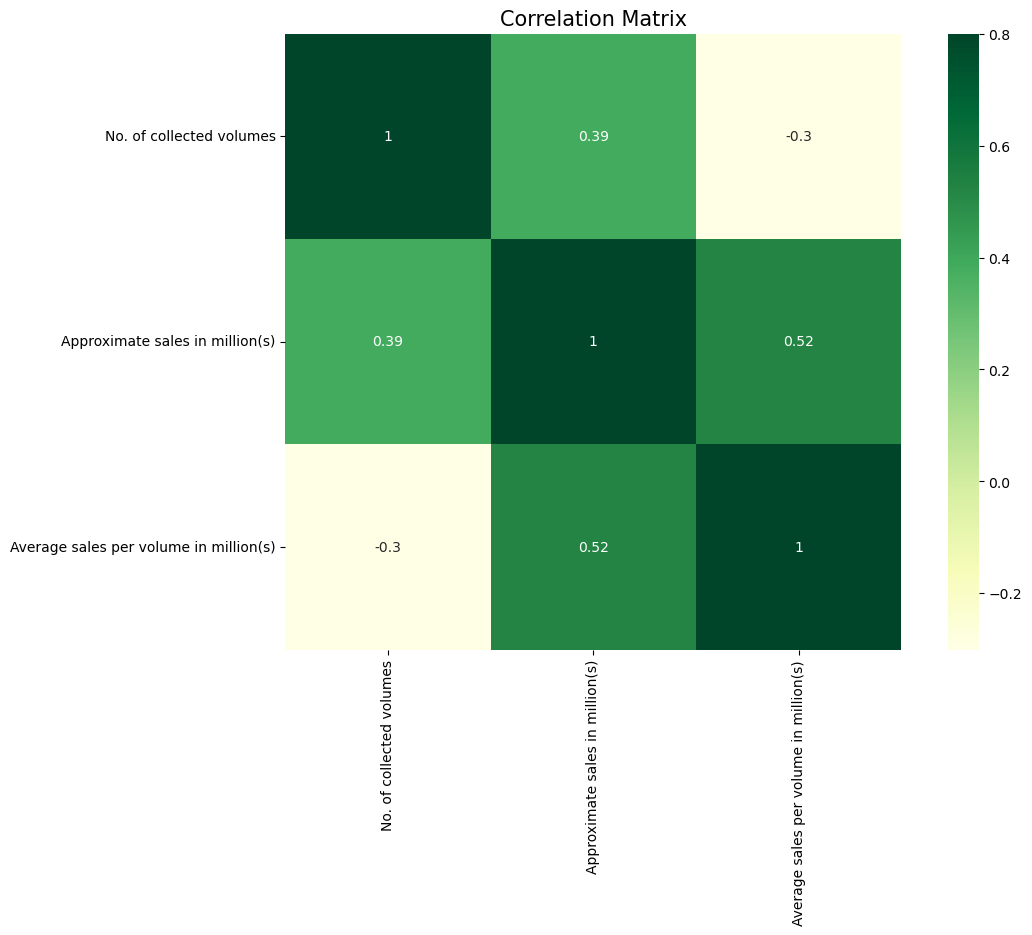

In [9]:
fig, ax = plt.subplots() 
fig.set_size_inches(12,8)
sns.heatmap(correlation_matrix, vmax =.8, square = True, annot = True,cmap='YlGn' )
plt.title('Correlation Matrix',fontsize=15);

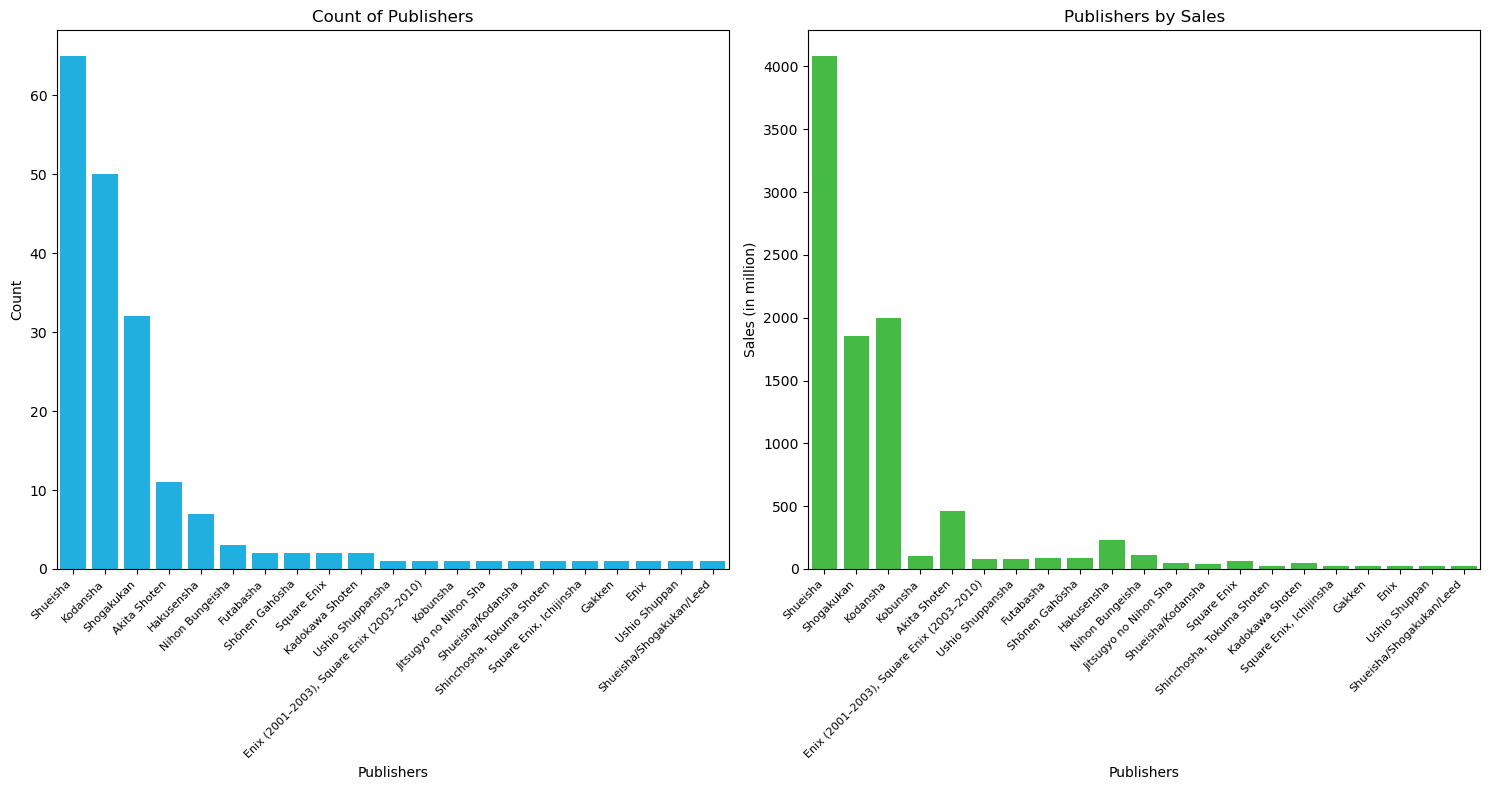

In [10]:
publisher_counts = df["Publisher"].value_counts()

# Plot count of publishers
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=publisher_counts.index, y=publisher_counts.values, color='deepskyblue')
plt.xlabel('Publishers')
plt.ylabel('Count')
plt.title('Count of Publishers')
plt.xticks(rotation=45, ha='right', fontsize=8)

# Plot publishers by sales
plt.subplot(1, 2, 2)
sns.barplot(x='Publisher', y='Approximate sales in million(s)', data=df, estimator=sum, errorbar=None, color='limegreen')
plt.xlabel('Publishers')
plt.ylabel('Sales (in million)')
plt.title('Publishers by Sales')
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

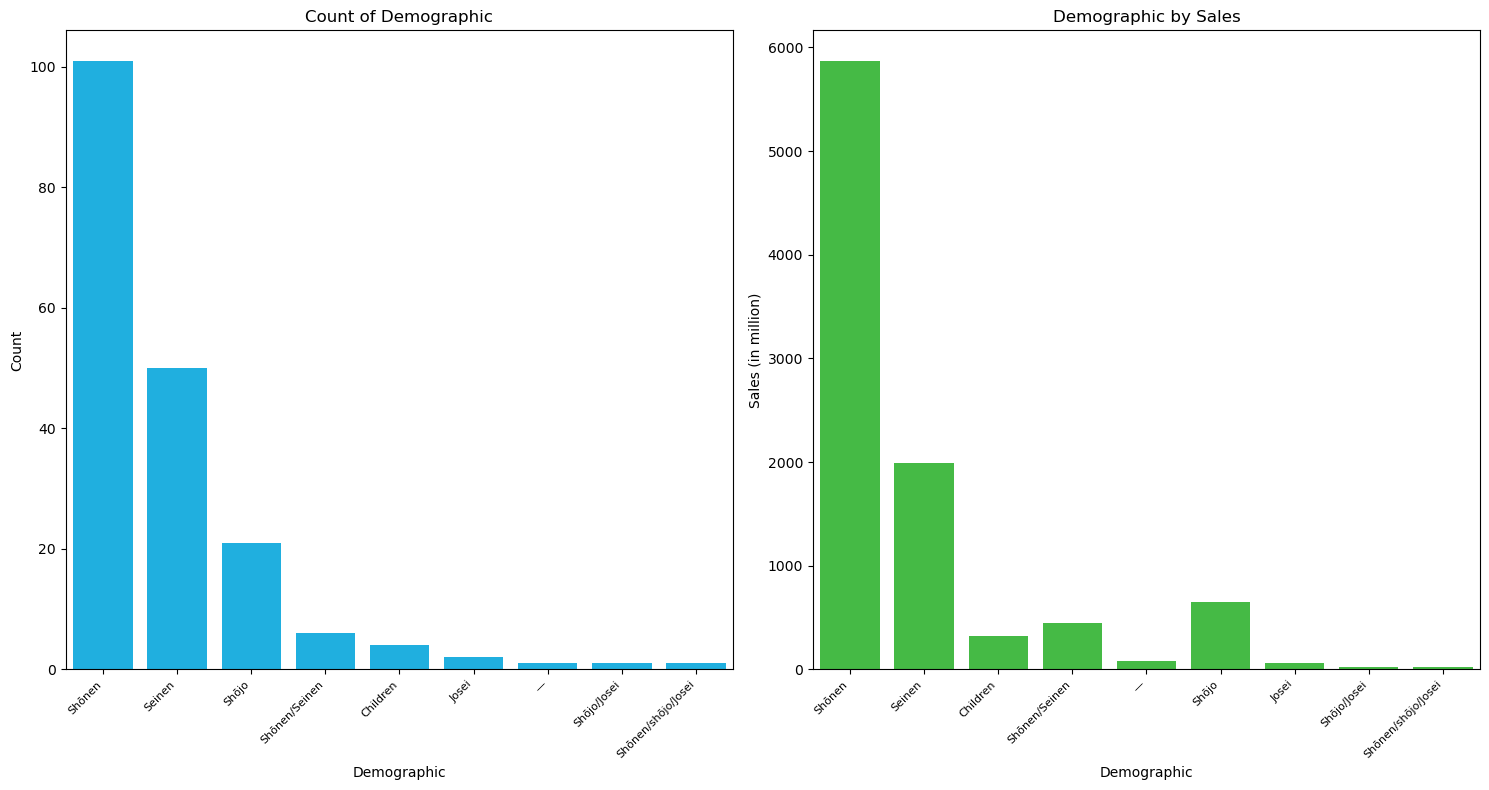

In [11]:
demographic_counts = df["Demographic"].value_counts()

# Plot count of publishers
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=demographic_counts.index, y=demographic_counts.values, color='deepskyblue')
plt.xlabel('Demographic')
plt.ylabel('Count')
plt.title('Count of Demographic')
plt.xticks(rotation=45, ha='right', fontsize=8)

# Plot publishers by sales
plt.subplot(1, 2, 2)
sns.barplot(x='Demographic', y='Approximate sales in million(s)', data=df, estimator=sum, errorbar=None, color='limegreen')
plt.xlabel('Demographic')
plt.ylabel('Sales (in million)')
plt.title('Demographic by Sales')
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

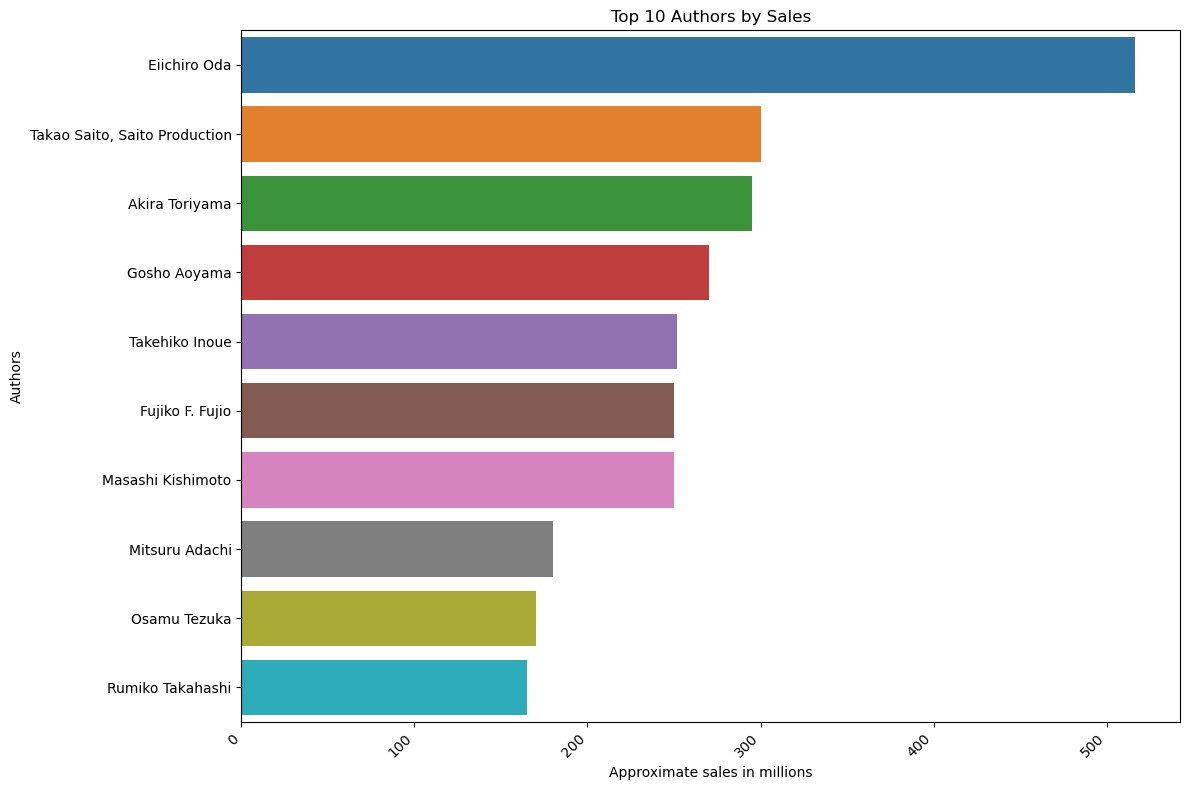

In [12]:
top_authors = df.groupby('Author(s)')['Approximate sales in million(s)'].sum().nlargest(10)

# Plotting the top 10 authors by sales
plt.figure(figsize=(12, 8))
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.xlabel('Approximate sales in millions')
plt.ylabel('Authors')
plt.title('Top 10 Authors by Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

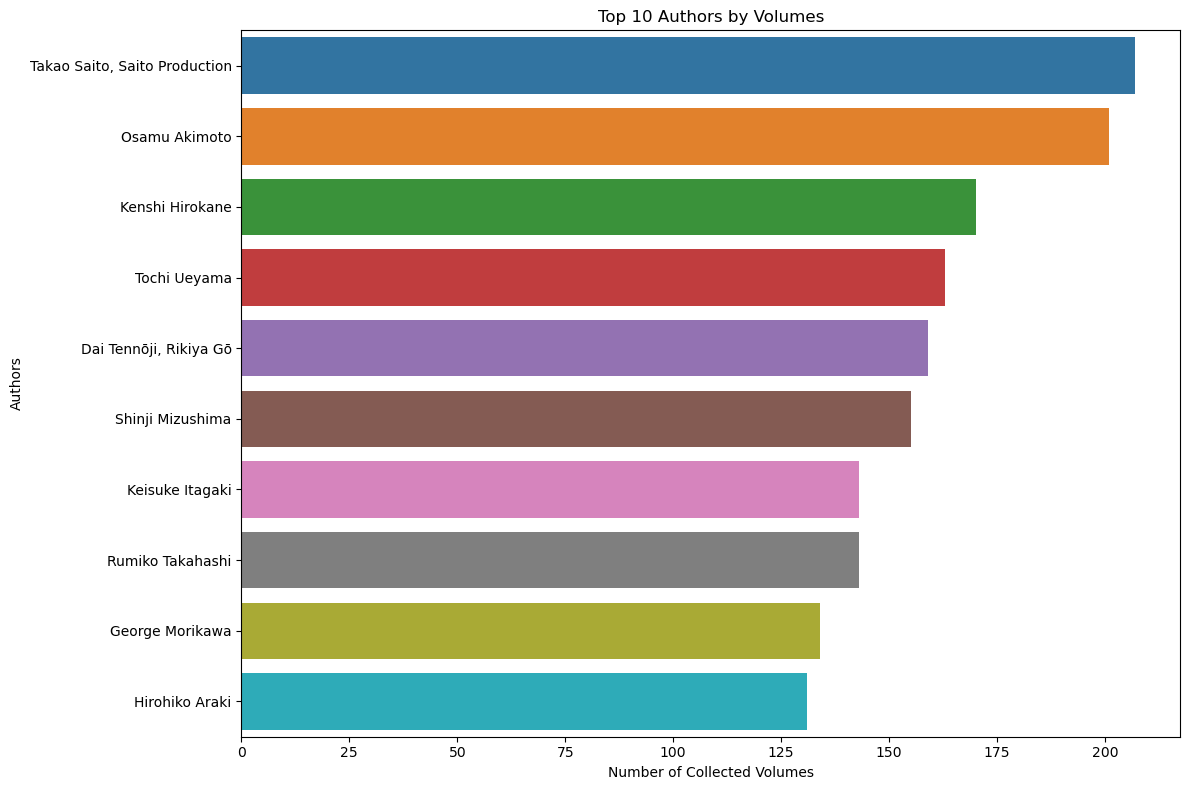

In [13]:
Authors_by_volume = df.groupby('Author(s)')["No. of collected volumes"].sum()
top_volume = Authors_by_volume.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_volume.values, y=top_volume.index)  # Transpose x and y
plt.xlabel('Number of Collected Volumes')
plt.ylabel('Authors')
plt.title('Top 10 Authors by Volumes')
plt.tight_layout()
plt.show()

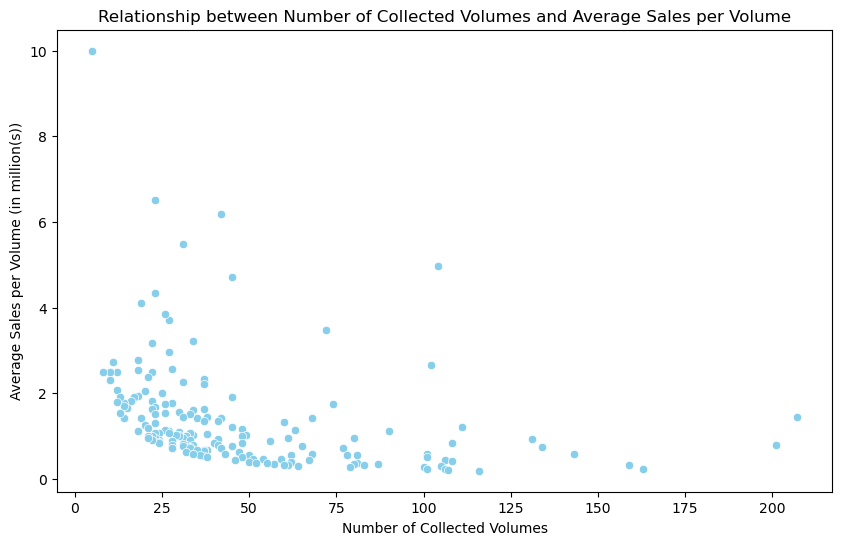

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='No. of collected volumes', y='Average sales per volume in million(s)', data=df, color='skyblue')
plt.title('Relationship between Number of Collected Volumes and Average Sales per Volume')
plt.xlabel('Number of Collected Volumes')
plt.ylabel('Average Sales per Volume (in million(s))')
plt.show()

In [15]:
current_year = str(pd.Timestamp.now().year)

def serialized_to_date(df):
    for i, serial in enumerate(df['Serialized']):
        if '–' in serial:
            # Split the string by comma and handle each part separately
            serial_parts = [part.strip() for part in serial.split(',')]
            start, end = serial_parts[0].rsplit('–', maxsplit=1)
            end = end.replace('present', current_year).replace('(on hiatus)', '').strip()
            df.at[i, 'Serialized_start'] = start.strip()
            df.at[i, 'Serialized_end'] = end
    # Convert the 'Serialized_start' and 'Serialized_end' columns to datetime objects
    df['Serialized_start'] = pd.to_datetime(df['Serialized_start'], errors='coerce')
    df['Serialized_end'] = pd.to_datetime(df['Serialized_end'], errors='coerce')
    display(df.head())

serialized_to_date(df)

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s),Serialized_start,Serialized_end
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97,1997-01-01,2024-01-01
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45,1968-01-01,2024-01-01
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65,1994-01-01,2024-01-01
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19,1984-01-01,1995-01-01
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71,1969-01-01,1996-01-01


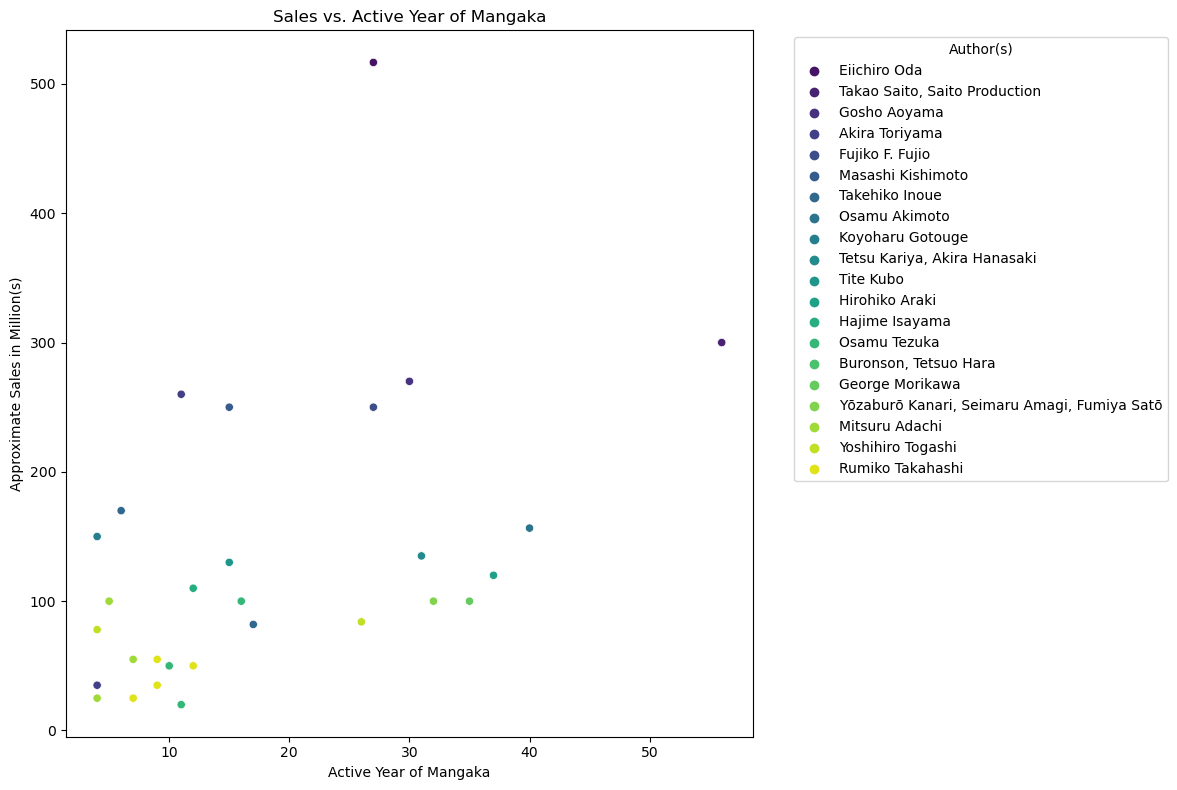

In [16]:
# Drop rows with missing values in 'Serialized_start' and 'Serialized_end'
valid_rows = df.dropna(subset=['Serialized_start', 'Serialized_end'])

# Create a new column for the active year of the mangaka
valid_rows['Active_Year'] = valid_rows['Serialized_end'].dt.year - valid_rows['Serialized_start'].dt.year

# Select top N authors based on sales
top_authors = valid_rows.groupby('Author(s)')['Approximate sales in million(s)'].sum().nlargest(20).index
valid_rows = valid_rows[valid_rows['Author(s)'].isin(top_authors)]


plt.figure(figsize=(12, 8))
sns.scatterplot(data=valid_rows, x='Active_Year', y='Approximate sales in million(s)', hue='Author(s)', palette='viridis')
plt.xlabel('Active Year of Mangaka')
plt.ylabel('Approximate Sales in Million(s)')
plt.title('Sales vs. Active Year of Mangaka')
plt.legend(title='Author(s)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## <div style="border-radius: 10px; border: 2px solid #ffd700; padding: 15px; background-color: #333; font-size: 120%; text-align: center; color: #ffd700; font-weight: bold;">4. Modeling</div>

We split the dataset into training and testing sets and applied cross-validation techniques along with hyperparameter tuning using GridSearchCV to optimize model performance.

In [17]:
target = 'Approximate sales in million(s)'
object_columns = df.select_dtypes(include=['object','datetime64']).columns
columns_to_drop = [target] + list(object_columns)

X = df.drop(columns = columns_to_drop ,axis=1)
y = df[target]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)
print(X_train.shape, y_train.shape)

(93, 2) (93,)


To achieve the goal of predicting approximate sales, I employed several machine learning models, including XGBoost, Random Forest, Linear Regression, and Gradient Boosting Regressor.

In [19]:
# Create dictionaries to store RMSE and MAE results
rmse_results = {}
mae_results = {}

models = [
    (XGBRegressor(), "XGBoost", {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}),
    (RandomForestRegressor(), "RF", {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}),
    (LinearRegression(), "LR", {}),
    (GradientBoostingRegressor(), "GBR", {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]})
        ]

for model, model_name, param_grid in models:
    # Perform cross-validation with GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=KFold(n_splits=5))
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store the results
    rmse_results[model_name] = rmse
    mae_results[model_name] = mae
    
    # Print the results
    print("Model :", model_name)
    print("Best Parameters:", best_params)
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print("--------")

Model : XGBoost
Best Parameters: {'max_depth': 3, 'n_estimators': 300}
RMSE : 21.70
MAE : 8.27
--------
Model : RF
Best Parameters: {'max_depth': None, 'n_estimators': 100}
RMSE : 38.23
MAE : 13.55
--------
Model : LR
Best Parameters: {}
RMSE : 45.17
MAE : 22.53
--------
Model : GBR
Best Parameters: {'max_depth': 3, 'n_estimators': 300}
RMSE : 30.42
MAE : 11.36
--------


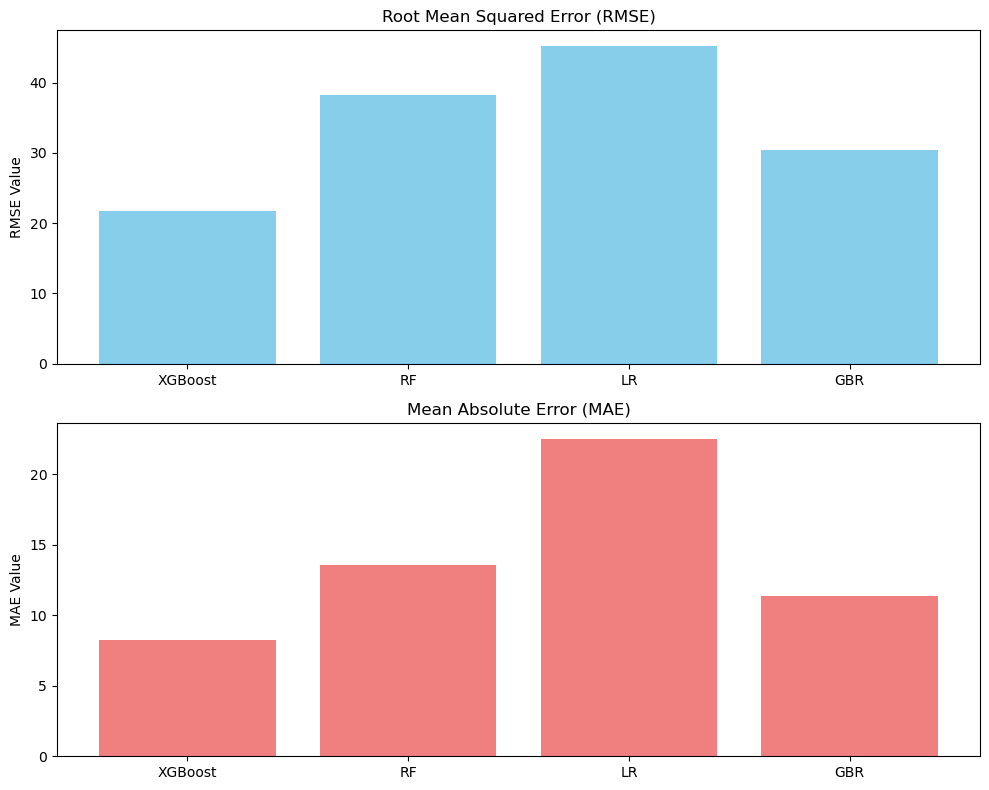

In [20]:
# Create bar charts to visualize RMSE and MAE
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot RMSE results
axes[0].bar(rmse_results.keys(), rmse_results.values(), color='skyblue')
axes[0].set_title('Root Mean Squared Error (RMSE)')
axes[0].set_ylabel('RMSE Value')

# Plot MAE results
axes[1].bar(mae_results.keys(), mae_results.values(), color='lightcoral')
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE Value')

plt.tight_layout()
plt.show()

# Model Performance Analysis:

* XGBoost:
The XGBoost model performed admirably, achieving an RMSE of 21.70 and an MAE of 8.27. The optimal hyperparameters for this model were found to be a maximum depth of 3 and 300 estimators. XGBoost's ability to handle complex relationships within the data contributed to its superior performance compared to other models.

* Random Forest:
Random Forest, while exhibiting decent performance, fell short of XGBoost's accuracy with an RMSE of 35.10 and an MAE of 12.52. The model was configured with 300 estimators and no maximum depth restriction, which may have led to slightly inferior performance compared to XGBoost.

* Linear Regression:
Linear Regression, despite its simplicity, yielded the highest RMSE of 45.17 and MAE of 22.53 among the tested models. This indicates that the linear model struggled to capture the nonlinear relationships inherent in the dataset, resulting in poorer predictive performance.

* Gradient Boosting Regressor:
The Gradient Boosting Regressor demonstrated competitive performance, achieving an RMSE of 29.19 and an MAE of 11.01. Similar to XGBoost, the optimal hyperparameters for this model included a maximum depth of 3 and 300 estimators. The model's ability to sequentially train weak learners and focus on the residuals contributed to its effectiveness in predicting manga sales.